In [8]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data_df.shape

(200, 4)

In [16]:
X1 = data_df['TV'].values
X2 = data_df[['TV','radio']].values
Y = data_df['sales'].values

## Using Only one Feature

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.25, random_state=989)

In [43]:
lin_regression = LinearRegression()
lin_regression.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [26]:
print(f"Eq of Line : y= {lin_regression.coef_[0]}x + {lin_regression.intercept_}")

Eq of Line : y= 0.04804237220910353x + 6.898594408446691


In [28]:
y_pred = lin_regression.predict(X_test.reshape(-1, 1))

### Performance Metrics

* Mean Absolute Error (MAE): $\frac{\sum_{i=1}^{N}|y_{actual} - y_{predicted}|}{N}$
* Mean Squared Error (MSE): $\frac{\sum_{i=1}^{N}(y_{actual} - y_{predicted})^2}{N}$
* R2: $1 - \frac{\sum(y_{actual} - y_{predicted})^2}{\sum(y_{actual} - mean)^2}$

In [42]:
print("Mean Abs. Error:", mean_absolute_error(y_test, y_pred))
print("Mean Sq. Error:",mean_squared_error(y_test, y_pred))

Mean Abs. Error: 2.3189045094669076
Mean Sq. Error: 9.104143414621536


### R2 Cofficient

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. It is calculated as:

$R^2 = 1 - \frac{RSS}{TSS}$

Where RSS is the residual sum of squares and TSS is the total sum of squares.

The RSS (Residual Sum of Squares) represents the sum of squared differences between the observed dependent variable values (y) and the predicted values (ŷ) obtained from the linear regression model. Mathematically, it is calculated as follows:

$RSS = Σ(y - ŷ)^2$

On the other hand, the TSS (Total Sum of Squares) represents the total variation in the dependent variable (y) from its mean (ȳ). It measures the sum of squared differences between each observed dependent variable value (y) and the mean of the dependent variable (ȳ). Mathematically, it is calculated as follows:

$TSS = Σ(y - ȳ)^2$

R-squared is always between 0 and 100%:

* 0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
* 100% represents a model that explains all the variation in the response variable around its mean.

In [37]:
r2_score(y_test, y_pred) * 100

63.59368418505787

## Using Two Feature

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.25, random_state=989)

In [45]:
lin_regression = LinearRegression()
lin_regression.fit(X_train, y_train)

LinearRegression()

In [48]:
print(f"Eq of Line : y= {lin_regression.coef_[0]}x1 +{lin_regression.coef_[1]}x2 + {lin_regression.intercept_}")

Eq of Line : y= 0.04368449216874512x1 +0.19841927316660588x2 + 3.068754245037585


In [49]:
y_pred = lin_regression.predict(X_test)

In [50]:
print("Mean Abs. Error:", mean_absolute_error(y_test, y_pred))
print("Mean Sq. Error:",mean_squared_error(y_test, y_pred))

Mean Abs. Error: 1.4641249236056046
Mean Sq. Error: 4.645921969880941


In [51]:
r2_score(y_test, y_pred) * 100

81.42154678545397

## Adjusted R2 coeff

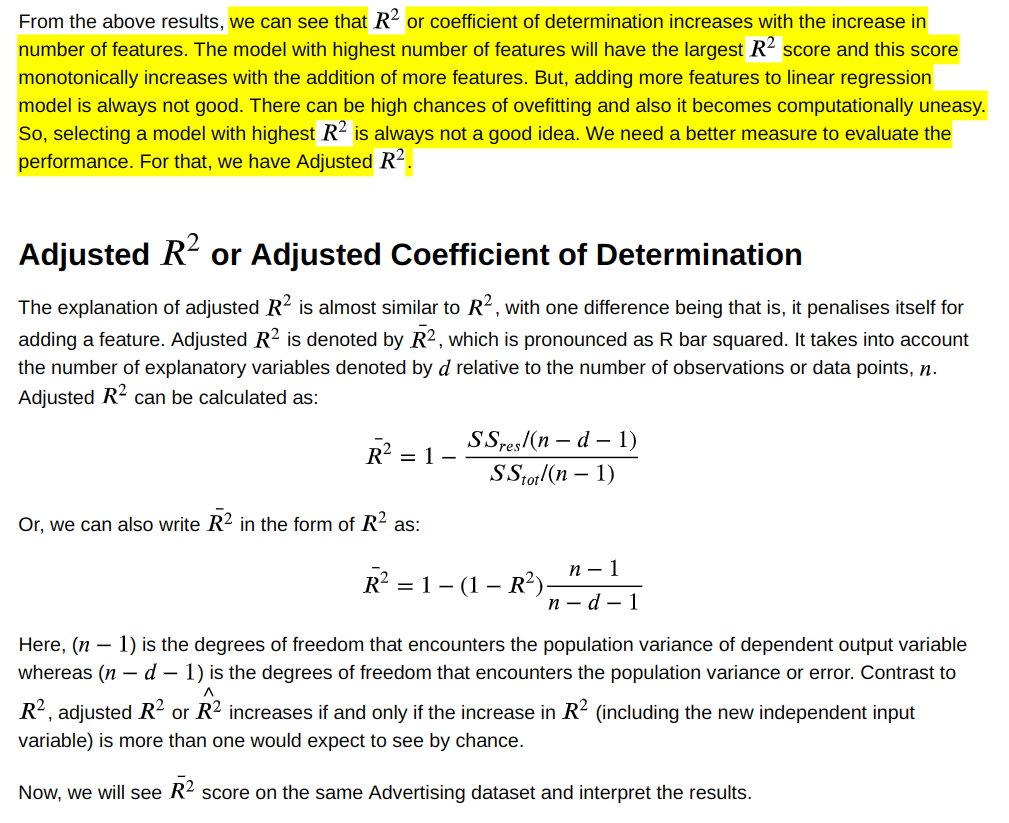

In [54]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(Y)-1)/(len(Y)-X2.shape[1]-1)

In [55]:
Adj_r2

0.8123293304723522